<a href="https://colab.research.google.com/github/bforoura/AI/blob/main/Module6/Edge_Detection_Conv2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Example of Edge Detection Using Convolution**

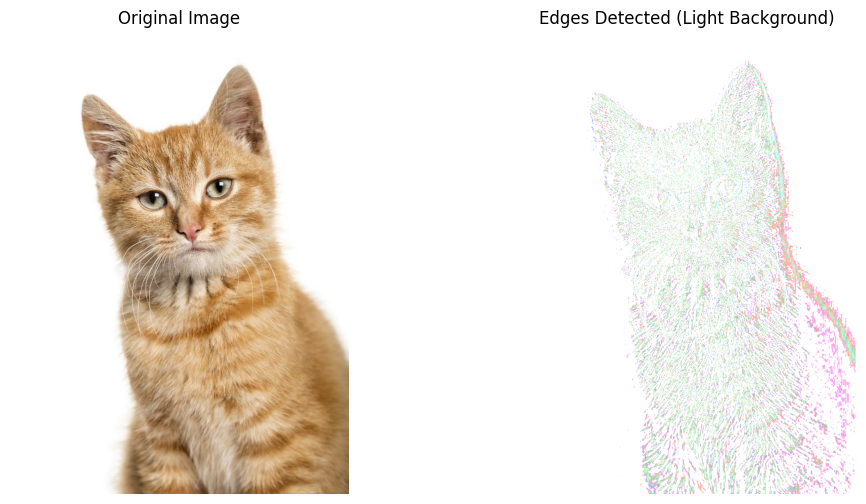

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import tensorflow as tf

# URL of the image
url = "https://thumbs.dreamstime.com/b/close-up-portrait-ginger-cat-white-background-isolated-105770790.jpg"

# Download the image
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Convert the image to a numpy array
image_np = np.array(image)

# Convert the image to float32 and add a batch dimension
image_float = tf.expand_dims(tf.image.convert_image_dtype(image_np, tf.float32), 0)

# Define a Sobel kernel with three input channels and one output channel
sobel_kernel = tf.constant([[[[-1., -2., -1.]],
                              [[ 0.,  0.,  0.]],
                              [[ 1.,  2.,  1.]]]], tf.float32)

# Apply Sobel edge detection using conv2d on CPU
with tf.device('/cpu:0'):
    edges = tf.nn.conv2d(image_float, sobel_kernel, strides=[1, 1, 1, 1], padding='SAME')

# Normalize the edges for display
edges = tf.squeeze(edges)
edges = (edges - tf.reduce_mean(edges)) / tf.math.reduce_std(edges) * 0.5 + 0.5

# Set background pixels to white
threshold = 0.6  # Adjust the threshold as needed
edges = tf.where(edges < threshold, 1.0, edges)

# Plot the original image and the edge-detected image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges Detected (Light Background)')
plt.axis('off')

plt.show()





